In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
import warnings
sb.set() # set the default Seaborn style for graphics

In [2]:
spotifyData = pd.read_csv('dataset.csv')
spotifyData.head()
spotifyData.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Popularity-based Clustering

In [3]:
popularity = pd.DataFrame(spotifyData[["popularity"]])
popularity.dtypes

popularity    int64
dtype: object

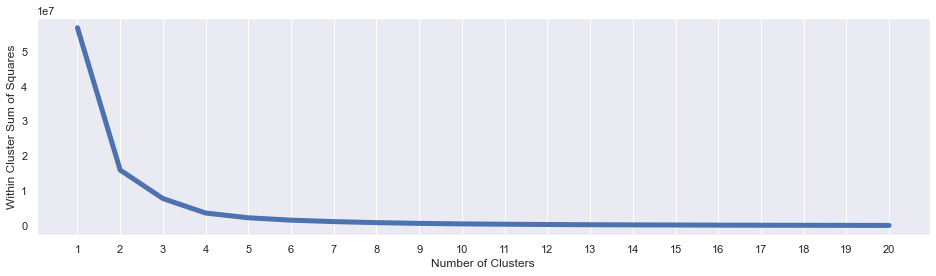

In [4]:
warnings.filterwarnings("ignore",category=UserWarning,module="sklearn")

# Vary the Number of Clusters
min_clust = 1
max_clust = 20

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(popularity)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss, lw=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.savefig('knee.png', format='png', bbox_inches='tight')

Cluster 0:	43.4	
Cluster 1:	64.0	
Cluster 2:	2.04	
Cluster 3:	23.59	

Within Cluster Sum of Squares : 3697980.857113791



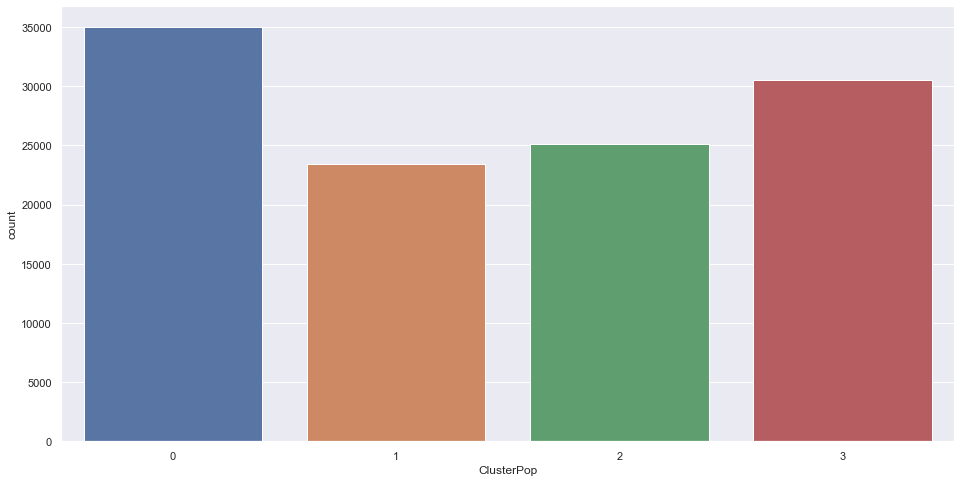

In [5]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 100)               

# Fit the Clustering Model on the Data
kmeans.fit(popularity)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(popularity)

# Append Labels to the Data
spotifyData_labeled = spotifyData.copy()
spotifyData_labeled["ClusterPop"] = pd.Categorical(labels)

# Summary of the Cluster Labels
f, axes = plt.subplots(1, 1, figsize=(16,8))
#plt.rcParams.update({'font.size': 50,
#                    'axes.titlesize' :50,
#                    'axes.labelsize' :50,
#                    'xtick.labelsize' :50,
#                    'ytick.labelsize' :50})
sb.countplot(x=spotifyData_labeled["ClusterPop"])
plt.savefig('ClusterPop.png', format='png', bbox_inches='tight')

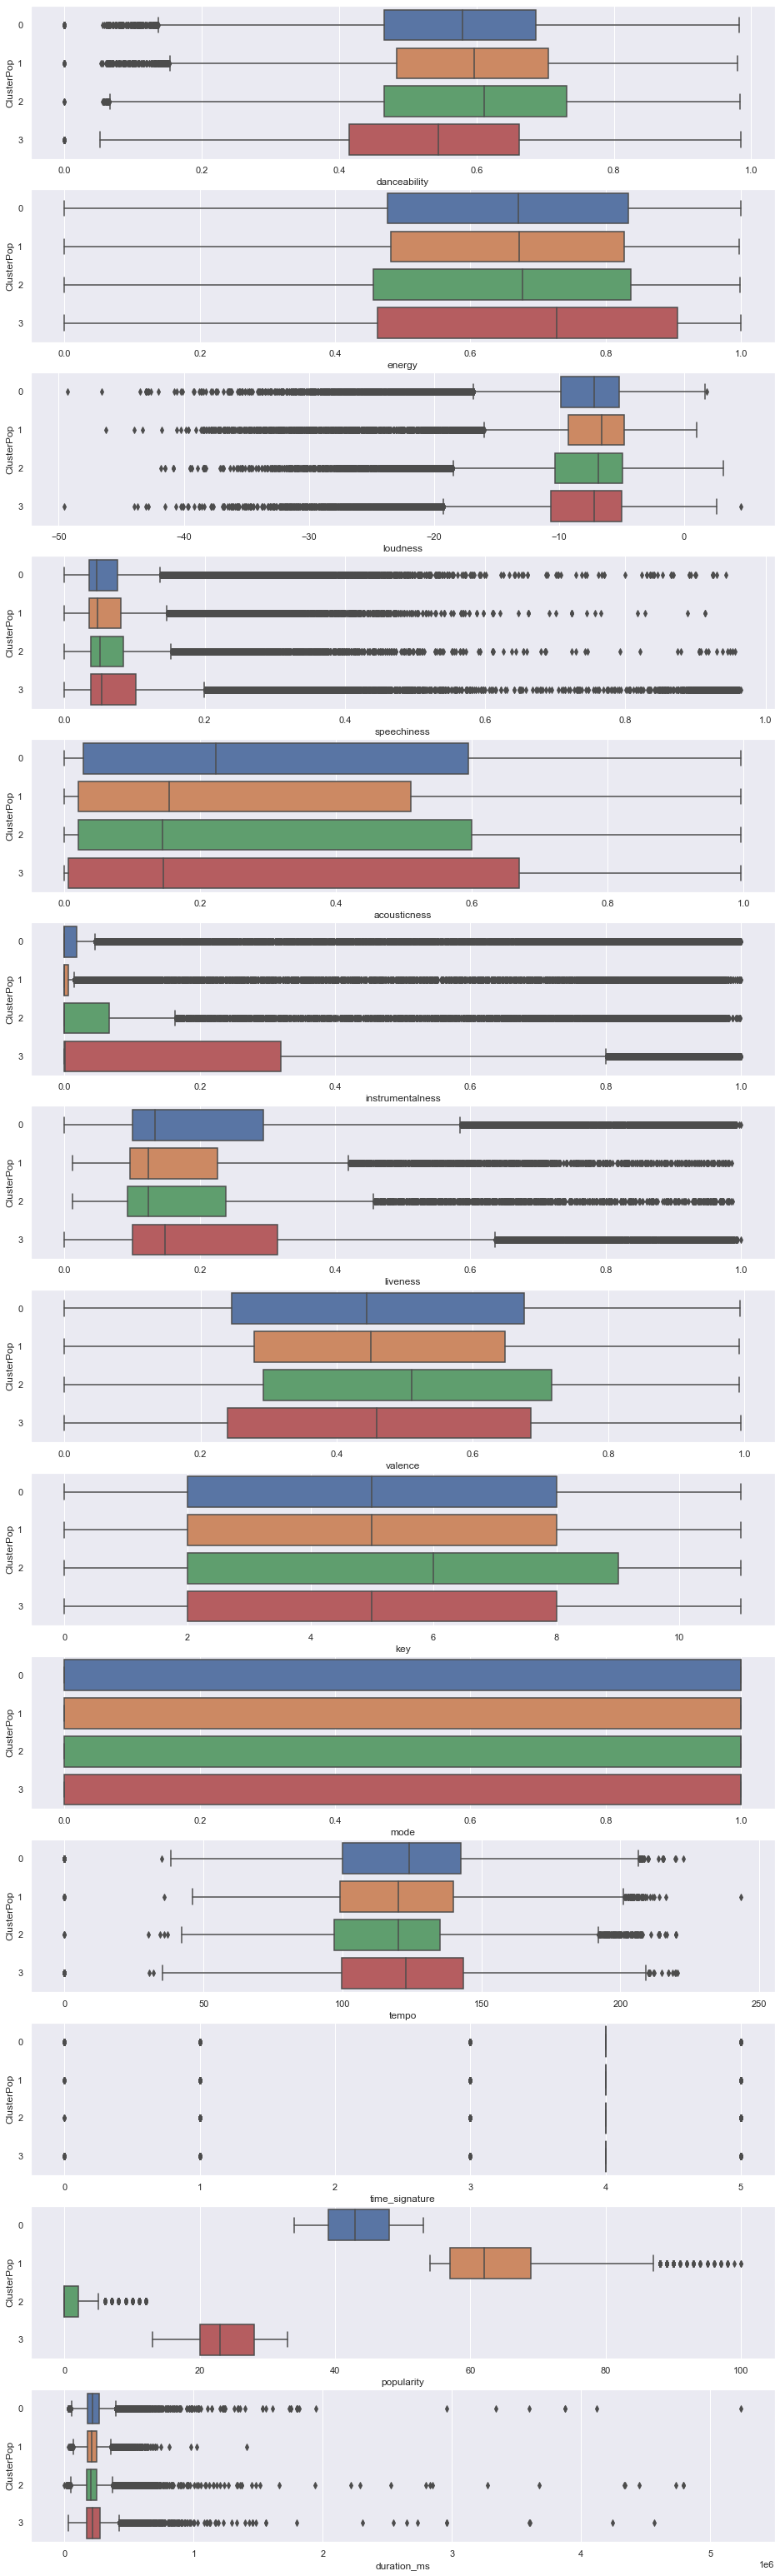

In [6]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(14, 1, figsize=(16,56))
#plt.rcParams.update({'font.size': 30,
#                    'axes.titlesize' :30,
#                    'axes.labelsize' :30,
#                    'xtick.labelsize' :30,
#                    'ytick.labelsize' :30})
sb.boxplot(x = 'danceability', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[0])
sb.boxplot(x = 'energy', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[1])
sb.boxplot(x = 'loudness', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[2])
sb.boxplot(x = 'speechiness', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[3])
sb.boxplot(x = 'acousticness', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[4])
sb.boxplot(x = 'instrumentalness', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[5])
sb.boxplot(x = 'liveness', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[6])
sb.boxplot(x = 'valence', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[7])
sb.boxplot(x = 'key', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[8])
sb.boxplot(x = 'mode', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[9])
sb.boxplot(x = 'tempo', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[10])
sb.boxplot(x = 'time_signature', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[11])
sb.boxplot(x = 'popularity', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[12])
sb.boxplot(x = 'duration_ms', y = 'ClusterPop', data = spotifyData_labeled, ax = axes[13])
plt.savefig('Boxplots.png', format='png', bbox_inches='tight')

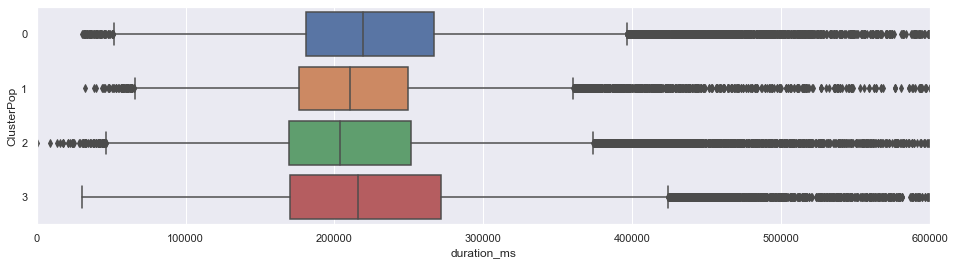

In [7]:
#Zoomed in Data for those that have very large range of values
f, axes = plt.subplots(1, 1, figsize=(16,4))
sb.boxplot(x = 'duration_ms', y = 'ClusterPop', data = spotifyData_labeled)
plt.xlim(0,600000)
plt.savefig('Boxplots-duration.png', format='png', bbox_inches='tight')

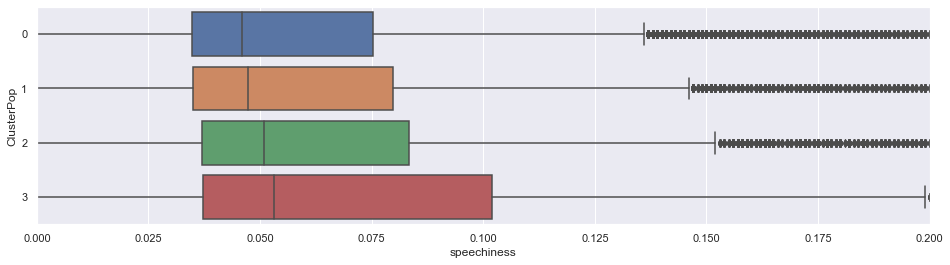

In [8]:
f, axes = plt.subplots(1, 1, figsize=(16,4))
sb.boxplot(x = 'speechiness', y = 'ClusterPop', data = spotifyData_labeled)
plt.xlim(0,.2)
plt.savefig('Boxplots-speech.png', format='png', bbox_inches='tight')

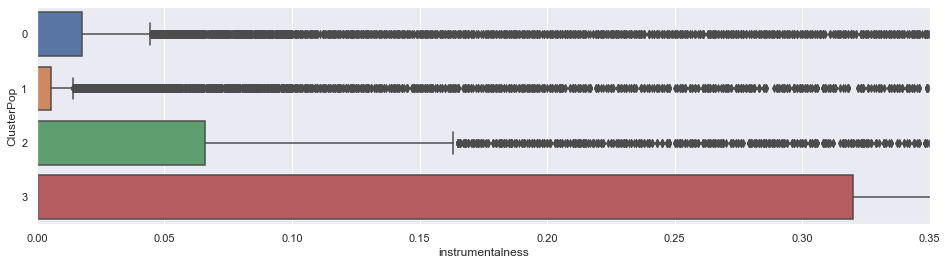

In [20]:
f, axes = plt.subplots(1, 1, figsize=(16,4))
sb.boxplot(x = 'instrumentalness', y = 'ClusterPop', data = spotifyData_labeled)
plt.xlim(0,.35)
plt.savefig('Boxplots-instrument.png', format='png', bbox_inches='tight')

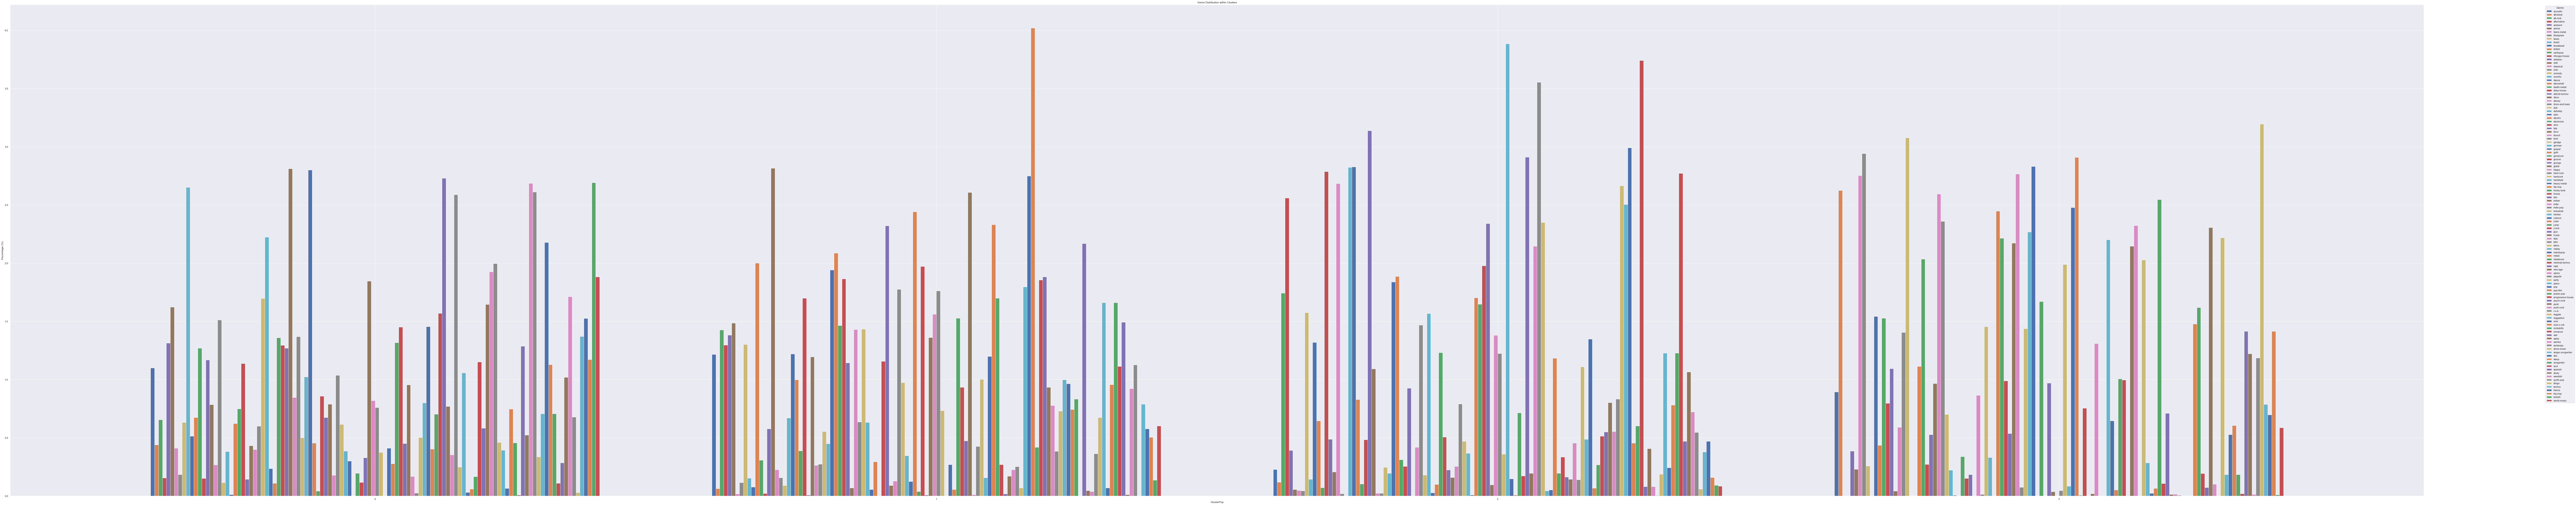

In [10]:
genre_counts = spotifyData_labeled.groupby(['ClusterPop', 'track_genre']).size().reset_index(name='Count')

# Calculate the total count per cluster
genre_counts['Cluster_Total'] = genre_counts.groupby('ClusterPop')['Count'].transform('sum')

# Calculate the percentage of each genre in each cluster
genre_counts['Percentage'] = (genre_counts['Count'] / genre_counts['Cluster_Total']) * 100

genre_pivot = genre_counts.pivot_table(index='ClusterPop', columns='track_genre', values='Percentage', fill_value=0)

ax = genre_pivot.plot(kind='bar', figsize=(160, 32), width=0.8)

# Customize the plot
plt.title('Genre Distribution within Clusters')
plt.ylabel('Percentage (%)')
plt.xlabel('ClusterPop')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('genre_distribution.png', format='png', bbox_inches='tight')

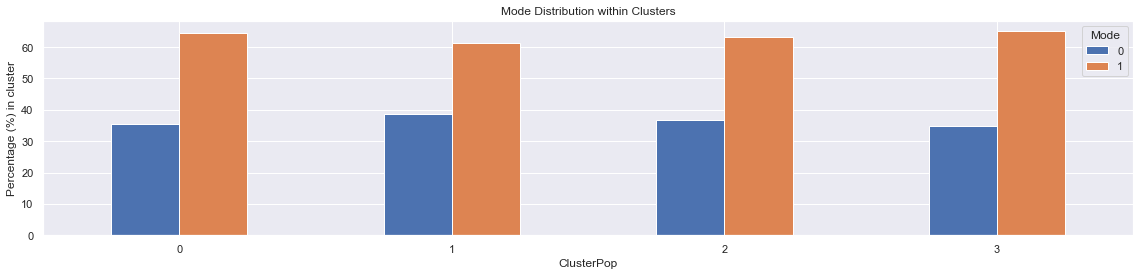

In [11]:
mode_counts = spotifyData_labeled.groupby(['ClusterPop', 'mode']).size().reset_index(name='Count')

# Calculate the total count per cluster
mode_counts['Cluster_Total'] = mode_counts.groupby('ClusterPop')['Count'].transform('sum')

# Calculate the percentage of each mode in each cluster
mode_counts['Percentage'] = (mode_counts['Count'] / mode_counts['Cluster_Total']) * 100

mode_pivot = mode_counts.pivot_table(index='ClusterPop', columns='mode', values='Percentage', fill_value=0)

ax = mode_pivot.plot(kind='bar', figsize=(16, 4))

# Customize the plot
plt.title('Mode Distribution within Clusters')
plt.ylabel('Percentage (%) in cluster')
plt.xlabel('ClusterPop')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Mode')
plt.tight_layout()
plt.savefig('mode_distribution.png', format='png', bbox_inches='tight')

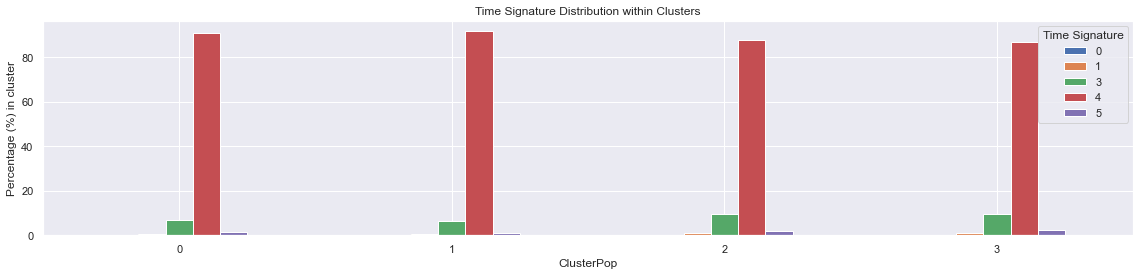

In [12]:
timesig_counts = spotifyData_labeled.groupby(['ClusterPop', 'time_signature']).size().reset_index(name='Count')

# Calculate the total count per cluster
timesig_counts['Cluster_Total'] = timesig_counts.groupby('ClusterPop')['Count'].transform('sum')

# Calculate the percentage of each time signature in each cluster
timesig_counts['Percentage'] = (timesig_counts['Count'] / timesig_counts['Cluster_Total']) * 100

timesig_pivot = timesig_counts.pivot_table(index='ClusterPop', columns='time_signature', values='Percentage', fill_value=0)

ax = timesig_pivot.plot(kind='bar', figsize=(16, 4))

# Customize the plot
plt.title('Time Signature Distribution within Clusters')
plt.ylabel('Percentage (%) in cluster')
plt.xlabel('ClusterPop')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Time Signature')
plt.tight_layout()
plt.savefig('timesig_distribution.png', format='png', bbox_inches='tight')

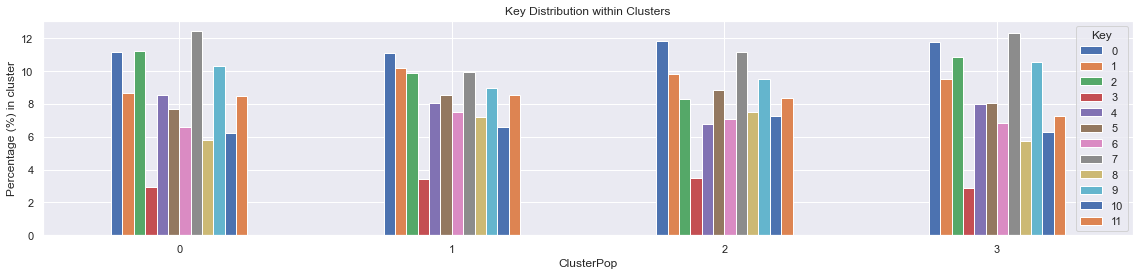

In [13]:
key_counts = spotifyData_labeled.groupby(['ClusterPop', 'key']).size().reset_index(name='Count')

# Calculate the total count per cluster
key_counts['Cluster_Total'] = key_counts.groupby('ClusterPop')['Count'].transform('sum')

# Calculate the percentage of each key in each cluster
key_counts['Percentage'] = (key_counts['Count'] / key_counts['Cluster_Total']) * 100

key_pivot = key_counts.pivot_table(index='ClusterPop', columns='key', values='Percentage', fill_value=0)

ax = key_pivot.plot(kind='bar', figsize=(16, 4))

# Customize the plot
plt.title('Key Distribution within Clusters')
plt.ylabel('Percentage (%) in cluster')
plt.xlabel('ClusterPop')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Key')
plt.tight_layout()
plt.savefig('key_distribution.png', format='png', bbox_inches='tight')